01. C'EST QUOI LE NLP ? ---> Excalidraw , huggingFace, Use Case .

quelque chose !!

In [1]:
a = 5
b = 2
a + b

7

In [2]:
print(a+b)

7


In [4]:
print("salut")

salut


In [5]:
"salut"

'salut'

#### 1. Importation des bibliothèques 

In [ ]:
#!pip install pandas

#!pip install scikit-learn

In [20]:
# First import the essential modules
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer # traitement de texte
from sklearn.decomposition import NMF # Modélisation des sujets
import numpy as np

#### 2. Chargement des données 

In [10]:
# Read data from the csv file
df = pd.read_csv('posts.csv')

In [12]:
df

,profileUrl,action,postContent,likeCount,commentCount,postDate,timestamp,postUrl
0,https://www.linkedin.com/in/emmanuel-acheampong/,Emmanuel Acheampong posted in Student Learning...,"Hello everyone,\n\nAfter researching and havin...",0,0,15h,2019-03-09T15:57:51.879Z,NaN
1,https://www.linkedin.com/in/emmanuel-acheampong/,Post,Day 73/365\nhashtag#365daysoflearning\n\nFor d...,8,2,15h,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:ac...
2,https://www.linkedin.com/in/emmanuel-acheampong/,Post,Day 72/365\nhashtag#365daysoflearning\n\nI hav...,1,1,1d,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:ac...
3,https://www.linkedin.com/in/emmanuel-acheampong/,Post,Day 71/365\nhashtag#365daysoflearning\n\nAs a ...,7,0,2d,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:ac...
4,https://www.linkedin.com/in/emmanuel-acheampong/,Post,We're living in a generation where we cannot t...,5,1,2d,2019-03-09T15:57:51.880Z,https://www.linkedin.com/feed/update/urn:li:ac...
...,...,...,...,...,...,...,...,...
247,https://www.linkedin.com/in/emmanuel-acheampong/,Post,hashtag#alwaysbelearning,4,0,10mo,2019-03-09T15:57:51.903Z,https://www.linkedin.com/feed/update/urn:li:ac...
248,https://www.linkedin.com/in/emmanuel-acheampong/,Post,I have been dabbling with virtual machines usi...,41,6,10mo,2019-03-09T15:57:51.903Z,https://www.linkedin.com/feed/update/urn:li:ac...
249,https://www.linkedin.com/in/emmanuel-acheampong/,Post,These inspiring stories on my LinkedIn feed ju...,11,0,10mo,2019-03-09T15:57:51.904Z,https://www.linkedin.com/feed/update/urn:li:ac...
250,https://www.linkedin.com/in/emmanuel-acheampong/,Post,“Never mind what others do; do better than you...,10,1,10mo,2019-03-09T15:57:51.904Z,https://www.linkedin.com/feed/update/urn:li:ac...


#### Prendre connaissance de son dataframe 

###### Afficher les 5 premières lignes d'une dataframe

In [13]:
df.head()

,profileUrl,action,postContent,likeCount,commentCount,postDate,timestamp,postUrl
0,https://www.linkedin.com/in/emmanuel-acheampong/,Emmanuel Acheampong posted in Student Learning...,"Hello everyone,\n\nAfter researching and havin...",0,0,15h,2019-03-09T15:57:51.879Z,NaN
1,https://www.linkedin.com/in/emmanuel-acheampong/,Post,Day 73/365\nhashtag#365daysoflearning\n\nFor d...,8,2,15h,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:ac...
2,https://www.linkedin.com/in/emmanuel-acheampong/,Post,Day 72/365\nhashtag#365daysoflearning\n\nI hav...,1,1,1d,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:ac...
3,https://www.linkedin.com/in/emmanuel-acheampong/,Post,Day 71/365\nhashtag#365daysoflearning\n\nAs a ...,7,0,2d,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:ac...
4,https://www.linkedin.com/in/emmanuel-acheampong/,Post,We're living in a generation where we cannot t...,5,1,2d,2019-03-09T15:57:51.880Z,https://www.linkedin.com/feed/update/urn:li:ac...


 ###### Connaître le nombre de colonnes et le nombre de lignes d'une dataframe

In [14]:
df.shape # description générale

(252, 8)

###### Connaître le nom des colonnes

In [15]:
df.columns

Index(['profileUrl', 'action', 'postContent', 'likeCount', 'commentCount',
       'postDate', 'timestamp', 'postUrl'],
      dtype='object')

###### Obtenir les informations générales de notre dataframe 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   profileUrl    252 non-null    object
 1   action        252 non-null    object
 2   postContent   246 non-null    object
 3   likeCount     252 non-null    int64 
 4   commentCount  252 non-null    int64 
 5   postDate      252 non-null    object
 6   timestamp     252 non-null    object
 7   postUrl       251 non-null    object
dtypes: int64(2), object(6)
memory usage: 15.9+ KB


#### 3. Nettoyage des données 

In [17]:
df["postContent"]

0      Hello everyone,\n\nAfter researching and havin...
1      Day 73/365\nhashtag#365daysoflearning\n\nFor d...
2      Day 72/365\nhashtag#365daysoflearning\n\nI hav...
3      Day 71/365\nhashtag#365daysoflearning\n\nAs a ...
4      We're living in a generation where we cannot t...
                             ...                        
247                             hashtag#alwaysbelearning
248    I have been dabbling with virtual machines usi...
249    These inspiring stories on my LinkedIn feed ju...
250    “Never mind what others do; do better than you...
251                                                  NaN
Name: postContent, Length: 252, dtype: object

In [21]:
import re
# Missing values : Convert all entries to strings and handle NaN values
df.loc[:, "postContent"] = df["postContent"].fillna("missing").astype(str)

# Normalisation : Apply the regex substitution and lowercasing using .loc and replace multi space by one space
df.loc[:, "postContent"] = df["postContent"].apply(lambda x: re.sub(r"\W+", " ", x.lower()))

print(df)

                                           profileUrl  \
0    https://www.linkedin.com/in/emmanuel-acheampong/   
1    https://www.linkedin.com/in/emmanuel-acheampong/   
2    https://www.linkedin.com/in/emmanuel-acheampong/   
3    https://www.linkedin.com/in/emmanuel-acheampong/   
4    https://www.linkedin.com/in/emmanuel-acheampong/   
..                                                ...   
247  https://www.linkedin.com/in/emmanuel-acheampong/   
248  https://www.linkedin.com/in/emmanuel-acheampong/   
249  https://www.linkedin.com/in/emmanuel-acheampong/   
250  https://www.linkedin.com/in/emmanuel-acheampong/   
251  https://www.linkedin.com/in/emmanuel-acheampong/   

                                                action  \
0    Emmanuel Acheampong posted in Student Learning...   
1                                                 Post   
2                                                 Post   
3                                                 Post   
4                        

In [22]:
df

,profileUrl,action,postContent,likeCount,commentCount,postDate,timestamp,postUrl
0,https://www.linkedin.com/in/emmanuel-acheampong/,Emmanuel Acheampong posted in Student Learning...,hello everyone after researching and having mu...,0,0,15h,2019-03-09T15:57:51.879Z,NaN
1,https://www.linkedin.com/in/emmanuel-acheampong/,Post,day 73 365 hashtag 365daysoflearning for day 7...,8,2,15h,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:ac...
2,https://www.linkedin.com/in/emmanuel-acheampong/,Post,day 72 365 hashtag 365daysoflearning i have be...,1,1,1d,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:ac...
3,https://www.linkedin.com/in/emmanuel-acheampong/,Post,day 71 365 hashtag 365daysoflearning as a pers...,7,0,2d,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:ac...
4,https://www.linkedin.com/in/emmanuel-acheampong/,Post,we re living in a generation where we cannot t...,5,1,2d,2019-03-09T15:57:51.880Z,https://www.linkedin.com/feed/update/urn:li:ac...
...,...,...,...,...,...,...,...,...
247,https://www.linkedin.com/in/emmanuel-acheampong/,Post,hashtag alwaysbelearning,4,0,10mo,2019-03-09T15:57:51.903Z,https://www.linkedin.com/feed/update/urn:li:ac...
248,https://www.linkedin.com/in/emmanuel-acheampong/,Post,i have been dabbling with virtual machines usi...,41,6,10mo,2019-03-09T15:57:51.903Z,https://www.linkedin.com/feed/update/urn:li:ac...
249,https://www.linkedin.com/in/emmanuel-acheampong/,Post,these inspiring stories on my linkedin feed ju...,11,0,10mo,2019-03-09T15:57:51.904Z,https://www.linkedin.com/feed/update/urn:li:ac...
250,https://www.linkedin.com/in/emmanuel-acheampong/,Post,never mind what others do do better than your...,10,1,10mo,2019-03-09T15:57:51.904Z,https://www.linkedin.com/feed/update/urn:li:ac...


#### 4. Préparation des données 

In [37]:
#!pip install stop-words


  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=dfdeb2e1d64045f245e8400712af1c795da50b9a7b90504fcb17d44d50535940
  Stored in directory: /home/keke/.cache/pip/wheels/8f/a5/51/a5405e1da5d178491b79d12cc81b6cb9bb14fe2c8c632eba70
Successfully built stop-words


In [23]:
# if french
# from stop_words import get_stop_words
# stop_words = get_stop_words('french')
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words=stop_words) 

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(df['postContent'])

On utilise le TfidfVectorizer pour convertir les textes en une matrice TF-IDF, un format utilisable pour les modèles de machine learning:

-> max_df=0.95 ignore les termes qui apparaissent dans plus de 95% des documents.

-> min_df=2 ignore les termes qui apparaissent dans moins de 2 documents.

-> stop_words='english' élimine les mots courants en anglais (stop words).

In [24]:
tfidf.shape

(252, 1000)

In [26]:
tfidf

<252x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 8261 stored elements in Compressed Sparse Row format>

In [27]:
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
tfidf_vectorizer.get_feature_names_out()

array(['000', '10', '100', '12', '20', '2018', '2019', '30', '365',
       '365daysoflearning', 'ability', 'able', 'absolutely', 'academic',
       'access', 'acclaim', 'achievement', 'active', 'actually', 'add',
       'adding', 'addition', 'address', 'addresses', 'advanced',
       'advantage', 'advice', 'africa', 'age', 'agile', 'ahead', 'ai',
       'aid', 'alex', 'algorithm', 'algorithms', 'allow', 'allowed',
       'allows', 'alwaysbelearning', 'amazing', 'analysis', 'andrew',
       'answer', 'anxiety', 'anybody', 'api', 'apis', 'app', 'apple',
       'application', 'applications', 'applied', 'apply', 'applying',
       'appreciate', 'approach', 'apps', 'ar', 'arena', 'art', 'article',
       'articles', 'artificial', 'artificialintelligence', 'ask', 'asked',
       'attend', 'attention', 'attract', 'available', 'aware', 'away',
       'awesome', 'aws', 'azure', 'background', 'bad', 'bakhirev', 'bash',
       'basic', 'basics', 'beautiful', 'beauty', 'began', 'begin',
       'be

In [29]:
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df

,000,10,100,12,20,2018,2019,30,365,365daysoflearning,...,writing,wrong,wrote,wwdc,yann,year,years,young,youtube,zhaime
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039506,0.039033,...,0.0,0.26177,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074987,0.074090,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041889,0.041388,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.071877,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.164011,0.000000,0.0,0.0
249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


#### 5 Modélisation des données 

Voici de quoi est constitué un post linkedin : Document > Sujets > Termes

On dit que on a des DOCUMENTS, qui abordent des SUJETS, qui continnent des TERMES, le point commun entre DOCUMENTS ET TERMES est alors le SUJET, donc le sujet bénéficiera d'une attention capitale de notre part, ce qui implique que la meilleure façon de modéliser une telle situation c'est d'utiliser NMF (Non-negative matrix factorization) .

Ici nous utilisons la modélisation dite NMF ; il s'agit d'une modélisation par Factorisation de Matrice Non-Négative (NMF) est une technique utilisée en apprentissage automatique et en traitement du langage naturel (NLP) pour réduire la dimensionnalité des données et identifier des thématiques sous-jacentes dans un corpus de documents. 

Comment ?

En décomposant une matrice V en deux matrices plus petites W et H telles que: V≈W×H .

Où :

- V est la matrice des données d'entrée (dans le cas du NLP, c'est souvent la matrice TF-IDF des documents).


- W (DOCUMENTS x SUJETS) est une matrice des caractéristiques latentes des documents. De dimension (m x k) avec m documents et k thématiques (ou composants) et une valeur w est l'intensité ou l'importance de chaque thématique dnas un document .


- H (SUJETS x TERMES) est une matrice des poids des caractéristiques pour chaque document. Celle-ci de dimension (k x n) où k est le nombre de thématiques (composants ou sujets) et n le nombre de termes (ou caractéristiques dans la matrices TD-IDF), une valeur h représente le poids de chaque terme dans un sujet.

Caractéristiques de la NMF :

-> Non-Négativité: Les valeurs dans les matrices W et H sont non négatives, ce qui signifie qu'elles ne contiennent que des valeurs positives ou nulles. Cela rend les résultats plus interprétables, car les composantes principales représentent des "présences" ou "absences" de caractéristiques, plutôt que des directions arbitraires dans l'espace de caractéristiques.

-> Interprétabilité: Grâce à la non-négativité, chaque document peut être représenté comme une somme additive des thématiques identifiées, ce qui est intuitivement plus facile à comprendre.

In [30]:
n_topic = 10 # Nombre de thématiques à découvrir

nmf_model = NMF(n_components=10, random_state=42)
W = nmf_model.fit_transform(tfidf)
H = nmf_model.components_

/home/keke/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [31]:
W # Doc x Subject

array([[4.43355576e-03, 0.00000000e+00, 4.17061918e-05, ...,
        4.11474496e-03, 7.47715462e-02, 4.83459621e-02],
       [8.88901834e-02, 0.00000000e+00, 3.25582219e-04, ...,
        6.14340343e-02, 3.48341097e-02, 0.00000000e+00],
       [1.27935819e-01, 1.06318798e-02, 7.61450293e-05, ...,
        0.00000000e+00, 4.81270246e-03, 0.00000000e+00],
       ...,
       [3.78191273e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.54698174e-01],
       [1.13253744e-01, 7.48484901e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.34060402e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [32]:
H # Subject x Terms

array([[1.59416180e-02, 4.89711209e-02, 0.00000000e+00, ...,
        7.28105519e-02, 9.41100640e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.12192011e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.32674289e-02, 3.08187205e-02, 2.78940361e-03, ...,
        0.00000000e+00, 4.01385117e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.82408567e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.85290904e-03, 1.92802552e-02, ...,
        9.15913826e-02, 2.16928102e-03, 5.74876897e-02]])

In [33]:
# Pour chaque thématique (composante de H), j'identifie les termes les plus représentatifs.
features = tfidf_vectorizer.get_feature_names_out()
features

array(['000', '10', '100', '12', '20', '2018', '2019', '30', '365',
       '365daysoflearning', 'ability', 'able', 'absolutely', 'academic',
       'access', 'acclaim', 'achievement', 'active', 'actually', 'add',
       'adding', 'addition', 'address', 'addresses', 'advanced',
       'advantage', 'advice', 'africa', 'age', 'agile', 'ahead', 'ai',
       'aid', 'alex', 'algorithm', 'algorithms', 'allow', 'allowed',
       'allows', 'alwaysbelearning', 'amazing', 'analysis', 'andrew',
       'answer', 'anxiety', 'anybody', 'api', 'apis', 'app', 'apple',
       'application', 'applications', 'applied', 'apply', 'applying',
       'appreciate', 'approach', 'apps', 'ar', 'arena', 'art', 'article',
       'articles', 'artificial', 'artificialintelligence', 'ask', 'asked',
       'attend', 'attention', 'attract', 'available', 'aware', 'away',
       'awesome', 'aws', 'azure', 'background', 'bad', 'bakhirev', 'bash',
       'basic', 'basics', 'beautiful', 'beauty', 'began', 'begin',
       'be

In [46]:
len(features)

1000

In [35]:
for i, topic in enumerate(H):
    # On sait que Topic est une ligne de H
    top_features_indices = topic.argsort()[-10:] # après avoir trié par ordre croissant, 
    # on trouve les indices des 10 termes les plus importants pour le sujet représenté par topic (ce sont els 10 derniers!!!)
    # car un terme est dit important lorsqu'il lorsqu'il a un poids élevé dans la matrice H pour un sujet particulier
    top_features = [features[index] for index in top_features_indices] # On utilise alors ces indices pour extraire les termes correspondants de la liste de termes (vocabulaire).
    print(f"Top words for topic {i}: {top_features}\n")

Top words for topic 0: ['hard', '365daysoflearning', 'really', 'interview', 'work', 'don', 'people', 'learn', 'day', 'things']

Top words for topic 1: ['coursera', 'learn', 'tensorflow', 'finance', 'mathematics', 'googlecloud', 'deeplearning', 'machinelearning', 'alwaysbelearning', 'hashtag']

Top words for topic 2: ['week', 'busy', 'taking', 'mini', 'pelcher', 'marcellus', 'life', 'interact', 'time', 'missing']

Top words for topic 3: ['webinar', 'ai', 'preparation', 'man', 'ibm', 'coursera', 'view', 'achievement', 'acclaim', 'verified']

Top words for topic 4: ['ly', 'coding', 'language', 'programming', 'jupyternotebooks', 'modules', 'lnkd', 'https', 'hashtag', 'python']

Top words for topic 5: ['lnkd', 'students', 'platform', 'aws', 'course', 'https', 'gcp', 'coursera', 'google', 'cloud']

Top words for topic 6: ['think', 'college', 'loves', 'students', 'machine', 'continues', 'moocs', 'courses', 'linkedin', 'learning']

Top words for topic 7: ['big', 'project', 'using', 'sql', 'not

#### 7. Analyse de la corrélation

In [36]:
df["topic"] = W.argmax(axis=1) # On récupère l'indice de la colonne (sujet/topic) avec la valeur maximale pour chaque ligne (document).

In [37]:
df

,profileUrl,action,postContent,likeCount,commentCount,postDate,timestamp,postUrl,topic
0,https://www.linkedin.com/in/emmanuel-acheampong/,Emmanuel Acheampong posted in Student Learning Ambassadors,hello everyone after researching and having multiple interviews with students at my school i have realized that even though a lot of college students want to improve their skills and utilize mooc platforms like linkedin learning and lynda they are not finding a support system to allow them to complete many of the courses they start to take as a result i am currently experimenting with the idea of creating a linkedin group for my school which would serve as a sort of book club but for linkedin learning courses this group would allow students to give honest feedback on courses they have taken to other students allow them to ask questions regarding particular course instructors and recommendations the community would also serve as a platform for people to discuss what they have studied in the various courses this all is in an effort to get students to not only enrol in courses but to complete them i would really appreciate questions comments or feedback from the cohort before i publish a manifesto for the group and publicize this idea here is the first iteration of the group https lnkd in esa6thu articles about low completion rates of moocs 1 https bit ly 2suuoet 2 https bit ly 2suuoet hashtag lslacohort2019,0,0,15h,2019-03-09T15:57:51.879Z,NaN,6
1,https://www.linkedin.com/in/emmanuel-acheampong/,Post,day 73 365 hashtag 365daysoflearning for day 73 in an effort to sharpen my sql mysql skills i finally completed the sql challenges on hackerrank and here are some of the things i observed 1 understanding the problem is 80 of the solution i finally realized why i got a lot of my hackerrank challenges wrong i was too hasty trying to solve the problems instead of fully understanding them most of the time my test cases didn t pass it wasn t because my syntax was wrong or i didn t know sql commands but because i was not answering the question 2 when i solve hackerrank challenges for fun and not for interview preparations or to put on my resume the challenges become really interesting without a time limit i was able to think critically and approach the problems from various angles get them wrong keep trying different approaches until they got solved 3 sql queries have a lot to do with intuition instead of memorizing the definitions of the various joins and special commands i realized that the more i practised the more i got a sense of what to do when i encountered more difficult problems in a sense practice makes perfect my hackerrank profile https bit ly 2uwrhve hackerrank sql challenges https bit ly 2ssb7dc check in tim,8,2,15h,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:activity:6509936031268171776,0
2,https://www.linkedin.com/in/emmanuel-acheampong/,Post,day 72 365 hashtag 365daysoflearning i have been travelling for most of today so i didn t get a chance to follow my planned learning schedule as usual however i believe you can learn through passive mediums like music as well while travelling i encountered the song pioneer by the band perry and i have been playing it non stop because of how touching the lyrics are to me here are some of my favourite lyrics from it 1 be careful of the careful souls who doubt you along the way 2 pioneer your work is hard but the future of us all rests on the shoulders of your heart 3 i won t rest where arms embrace me 4 i will love when people hate me 5 i won t hush no you can t make me 6 send the dark but it won t break me song https bit ly 2vpyddz check in tim salau,1,1,1d,2019-03-09T15:57:51.879Z,https://www.linkedin.com/feed/update/urn:li:activity:6509628215001169920,0
3,https://www.linkedin.com/in/emmanuel-acheampong/,Post,day 71 365 hashtag 365daysoflearning as a person who would like to hopefully own a patent one day i took the time to read over what it takes to be a patent hold

In [51]:
df.topic

0      6
1      0
2      0
3      8
4      9
      ..
247    1
248    5
249    9
250    0
251    2
Name: topic, Length: 252, dtype: int64

On dit alors que pour le document 0, le sujet 6 est dominant (le plus intéressant/pertinent/le plus fortement représenté), etc !!

In [38]:
# On évalue l'engagement moyen pour chaque sujet :
# en regroupe les documents par le sujet dominant identifié dans la colonne topic
# et, pour chaque groupe de sujet, on calcule la moyenne des likeCount et commentCount
grouped_data = df.groupby('topic').agg({'likeCount':'mean', 'commentCount':'mean'})

In [39]:
# On obtient un nouveau DataFrame où chaque ligne représente un sujet et les colonnes contiennent les moyennes des likes et des commentaires 
# pour les documents de ce sujet.
grouped_data

,likeCount,commentCount
topic,,
0,25.113636,2.022727
1,16.709677,1.258065
2,13.333333,0.833333
3,16.333333,1.000000
4,70.789474,2.105263
5,25.285714,2.928571
6,50.035714,5.285714
7,35.714286,3.428571
8,21.800000,2.350000


Donc on obtient les moyennes des likes et des commentaires pour chaque sujet, ce qui permet de voir quels sujets sont les plus engageants en moyenne.

In [40]:
correlation_matrix = grouped_data.corr()

In [41]:
print(correlation_matrix)

              likeCount  commentCount
likeCount      1.000000      0.541401
commentCount   0.541401      1.000000


On examine comment les moyennes des likes et des commentaires sont corrélées, 
ce qui peut indiquer si les sujets qui reçoivent plus de likes ont aussi tendance à recevoir plus de commentaires, et vice versa.

On peut alors conclure ce qui suit :

-> Il s'agit d'une valeur de corrélation positive modérée :
    
    Corrélation Positive : Une valeur positive signifie que, en général, à mesure que le nombre de likes augmente pour un sujet donné, le nombre de commentaires tend également à augmenter.

-> Magnitude de la Corrélation : La valeur 0.541401 n'est pas proche de 1, donc la corrélation n'est pas très forte (n'est pas parfaite), mais elle peut indiquer une tendance.

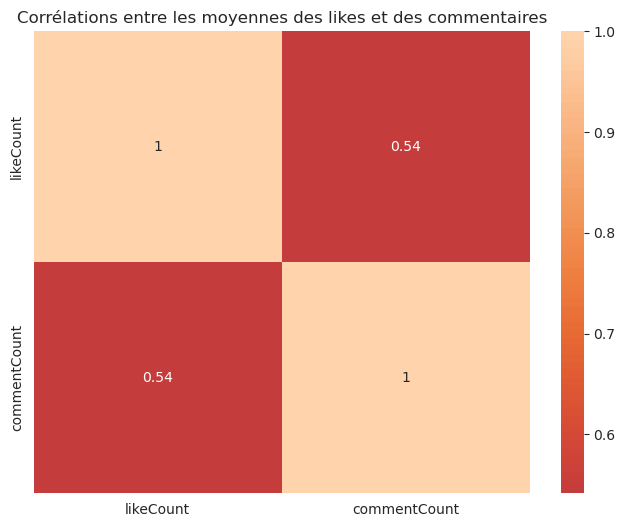

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.title('Corrélations entre les moyennes des likes et des commentaires')
plt.show()

#### 8. Visualisation 

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

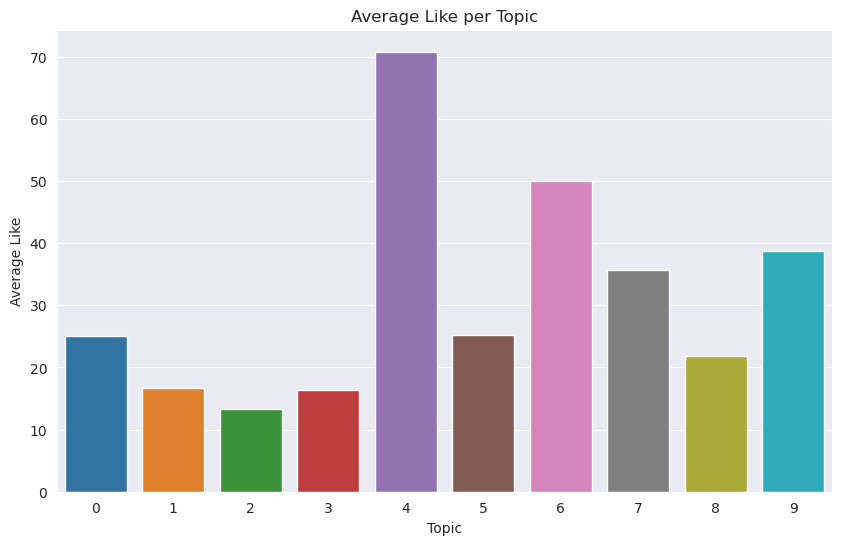

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
average_like = df.groupby('topic')['likeCount'].mean()
sns.barplot(x=np.arange(10), y=average_like, ax=ax)

ax.set_title("Average Like per Topic")
ax.set_xlabel('Topic')
ax.set_ylabel('Average Like')

plt.show()

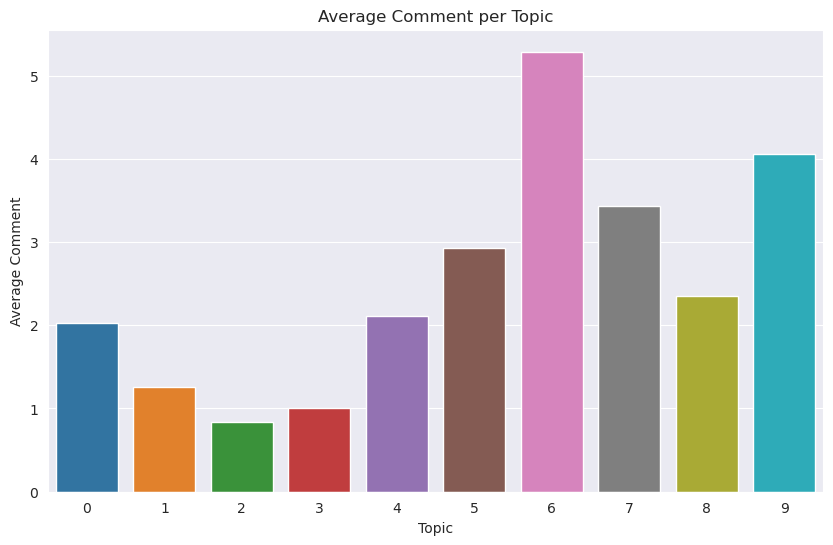

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
average_like = df.groupby('topic')['commentCount'].mean()
sns.barplot(x=np.arange(10), y=average_like, ax=ax)

ax.set_title("Average Comment per Topic")
ax.set_xlabel('Topic')
ax.set_ylabel('Average Comment')

plt.show()

# Travail Pratique : YOUTUBE FRANCE (YF)


### NOTEZ BIEN : à partir d'ici, tout est lecture, si vous savez lire, et comprendre ce que vous lisez (même les documentations officielles ou technique des librairies) alors vous vous garantissez au moins 40% de votre résussite.


#### Bienvenue chez YF!!!!! 


Le but de ce travail est de vous faire comprendre que l'amélioration de l'Image de marque personnelle est souvent une affaire de tous et donc peut se traiter selon le contexte dans le quel on se retrouve.


vous êtes Data Scientist, et ici on veut que vous puissiez aider 2 grandes icones de la musique française à se faire une idée sur l'offre qu'elles proposent dans leur registre musical respectif.

Vous n'êtes pas seul et avez n (un ou deux) colllègues avec vous.

STEP 1 ::: La tâche n'étant pas simple, vous allez choisir une seule rubrique sur 8 :

- Soul : Ben l'Oncle Soul, Camille, Imany;
- R&B : Dadju, Aya Nakamura, Slimane (/Tayc);
- Pop : Angèle, Vianney, Clara Luciani;
- Rap : Booba, PNL, SCH (/Ninho/youssoupha);
- Zouk : Kassav, Jacob Desvarieux, Jean-Michel Rotin (Fanny j);
- Rock : Indochine, Téléphone, Noir Désir;
- Electro : Daft Punk, David Guetta, Justice;
- Reggae : Tiken Jah Fakoly, Dub Inc, Naâman.

STEP 2  :::  Nous avons désigné des artists au hasard, une fois la rubrique séléctionné, voici ce que vous devez faire :

- Pour chaque artist, et pour une même année, choisissez une chanson (par exemple un hit d'été 2012), vous aurez donc 2 hits (pas moins, pas plus);
- Pour chaque hit constituez votre dataset en (Contenu,[comments],like);
- le contenu représente les paroles de la chanson , que vous devez télécharger, exemple : lyrics de Matt Pokora ;
- les comments représentent une liste de max 100 commentaires (si pas les top commentaires).
- les like représente les like du post

STEP 3 ::: Vous allez ensuite :

- Faire de l'analyse de concurrence (comparer les n hits), vous pourriez par exemple découvrir que l'un est plus technique que l'autre, etc ;
- Faire de l'analyse des appréciations , vous pourriez par exemple dire que PETROUCHKA de SOSO MANES n'est pas un flop ;
- Mettre en exergue les thématiques , les sujets, les avis qui sont les plus abordés ou, qui reviennent le plus en commentaire et établir les correlations avec les lyrics;
- Vous allez réaliser des visualisations, par exemple en tenant compte du temps (ligne de temps, courbes, etc.) ;
- Enfin, vous ferai du conseil, vous allez rédiger un rapport où vous mettrez en lumière les points (analyses) précédents et, où on attendra de vous vos conclusions et recommandations .


L'exercice n'est pas simple, du fait que, une chanson sans parole possède sa particularité, une chanson avec parole mais qui n'a pas trop de sens ou de profondeur peut aussi avoir un feedback différent qui sera par exemple basé sur le ressenti du public, une chanson avec des paroles structurées engendrera des commentaires qui resterons objectif et axé sur les textes.

Ce n'est donc pas un exercice simple, il représente la réalité , mais si vous y parvenez, alors quelque soit la plateforme, vous pourriez étudier et améliorer l'image de marque de vos clients.

RENDU : Aujourd'hui en fin de séance, un rapport + un notebook et, le tout compressé dans un fichier ZIP à rendre sur PEPAL.


VOUS AVEZ BESOIN DE GOOGLE CLOUD PLATEFORME (GCP) pas de panique, c'est gratuit et pas besoin de votre carte bancaire pour générer une api key !!!! 

vous avez un quota de 12 projets gratuits !!!

UNE LIBRAIRIE YOUTUBE POUR PYTHON QUI VOUS SERA UTILE: https://pypi.org/project/python-youtube/

In [ ]:
# TODO:::
# installez la librairie
!pip install python-youtube

SA DOCUMENTATION : https://sns-sdks.lkhardy.cn/python-youtube/ ALLEZ DANS LE GETTING STARTED (https://sns-sdks.lkhardy.cn/python-youtube/getting_started/) ... GETTING-STARTED utilise la documentation officielle de l'API de YOUTUBE qui est la suivante (celle de google en générale , car youtube appartient à google / et linkedin à microsoft) : https://developers.google.com/youtube/v3/docs?hl=fr

Vous devez donc créer un projet et générer une api key ici : https://console.cloud.google.com/projectselector2/apis/dashboard?hl=fr&supportedpurview=project

In [ ]:
# TODO:::
# remplacez "your api key" par la valeur d'api générée !
from pyyoutube import Client

cli = Client(api_key="your api key")

Bon travail !